# RQ1

In [2]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime

After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an **Exploratory Data Analysis (EDA)**. What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [4]:
posts = pd.read_csv('~/instagram_posts.csv', sep='\t', nrows = 10000)
profiles = pd.read_csv('~/instagram_profiles.csv', sep='\t')
locations =  pd.read_csv('~/instagram_locations.csv', sep='\t')

In [4]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              10000 non-null  int64 
 1   sid_profile      10000 non-null  int64 
 2   post_id          10000 non-null  object
 3   profile_id       10000 non-null  int64 
 4   location_id      10000 non-null  int64 
 5   cts              10000 non-null  object
 6   post_type        10000 non-null  int64 
 7   description      9228 non-null   object
 8   numbr_likes      10000 non-null  int64 
 9   number_comments  10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [9]:
posts.columns

Index(['sid', 'sid_profile', 'post_id', 'profile_id', 'location_id', 'cts',
       'post_type', 'description', 'numbr_likes', 'number_comments'],
      dtype='object')

In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [11]:
profiles.columns

Index(['sid', 'profile_id', 'profile_name', 'firstname_lastname',
       'description', 'following', 'followers', 'n_posts', 'url', 'cts',
       'is_business_account'],
      dtype='object')

In [12]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [13]:
locations.columns

Index(['sid', 'id', 'name', 'street', 'zip', 'city', 'region', 'cd', 'phone',
       'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'dir_city_id',
       'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'slug', 'website', 'cts'],
      dtype='object')

In [14]:
profiles.isnull().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

There are many missing values in the data

In [15]:
profiles.duplicated().sum()

0

# RQ2

1. Plot the number of posts for each profile in descending order.

In [9]:
n_posts_ordered= profiles.sort_values(by=['n_posts'],ascending=False)[['profile_name','n_posts']]
n_posts_ordered.dropna()

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
...,...,...
2402230,faith.dever,0.0
2402229,sugarsprinkledglitter,0.0
377966,hannahkraft13,0.0
2402225,4pf_cj_,0.0


<AxesSubplot:>

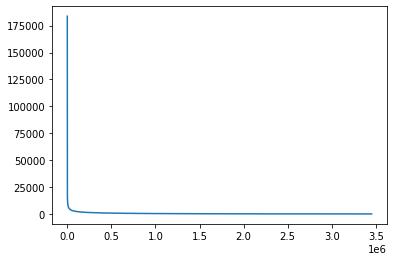

In [7]:
profiles.sort_values(by = 'n_posts', ascending = False, ignore_index=True).n_posts.plot()

<AxesSubplot:title={'center':'Boxplot for # of Posts per user without outliers'}>

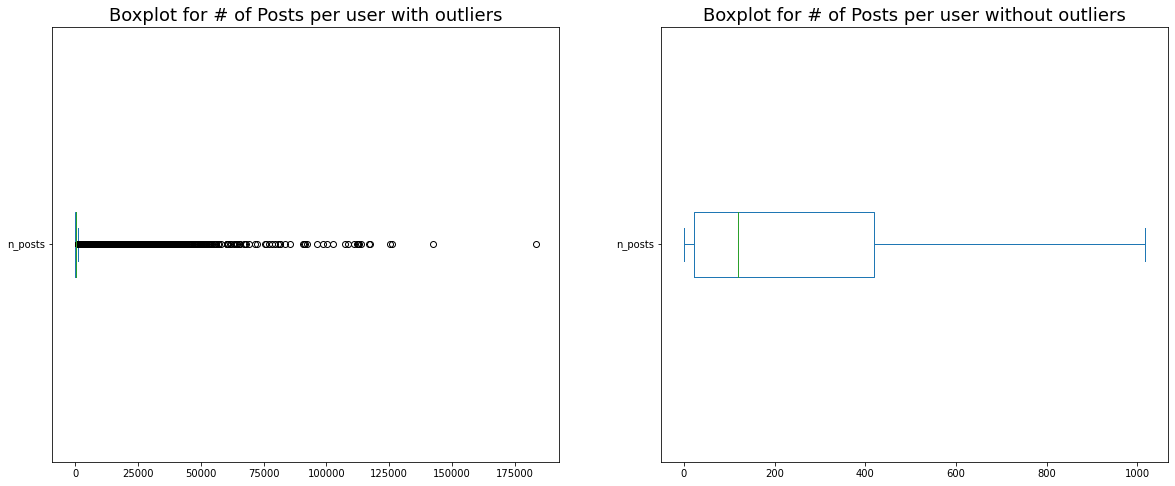

In [10]:
plt.figure(figsize=(20, 8))

one = plt.subplot(1, 2, 1)
one.set_title("Boxplot for # of Posts per user with outliers", 
             {"fontsize":18})
profiles['n_posts'].plot(kind='box',vert=False)

two = plt.subplot(1, 2, 2)
two.set_title("Boxplot for # of Posts per user without outliers", 
             {"fontsize":18})
profiles['n_posts'].plot.box(showfliers=False,vert=False)

In [11]:
n_posts_ordered.describe()

,n_posts
count,3.452771e+06
mean,4.095414e+02
std,1.041940e+03
min,0.000000e+00
25%,2.200000e+01
50%,1.200000e+02
75%,4.200000e+02
max,1.837300e+05


In a first moment we ordered the profiles by number of posts in descending order. The user who published the most is "jasem33312" with 183730 posts. To analize the population we used two boxplots, a tool for a fast explorative analyses, and a summary to fix the info given by the plots. It's evident the presence of strong outliers. In the first image the five indicators of the box (lim inf, 1st quantile, median, 2nd quantile, lim sup) are all aligned, in fact 75% of the 4.509586e+06 users published not more than 287 posts. The variance is (9.280713e+02)^2, indicator of a highly volatile number of posts. 25% of the population is not active with 0 posts and a few are the viceversa.

2. What posts have the highest number of "likes"?

In [4]:
posts_likes = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols= ['post_id','numbr_likes'])
print(posts_likes.sort_values(by=['numbr_likes'],ascending=False).head(10))

              post_id  numbr_likes
19624085  Bt3yaXmAM0d    8822952.0
19623988  BuwffB7g8cK    5447066.0
19624082  Buc1gyZAaMQ    5116398.0
19623986  BvcukE8AMuG    4271466.0
39701024  BqSLFVBFLfq    4264745.0
6293907   BwTSXBKg7gN    3586546.0
19624086  Btw8pFXAvQm    3558599.0
19802016  BvC3n6_gqin    3533326.0
30850564  Bw7vqLrFkHi    3340297.0
39812576  Bw2gTH1AiDA    3311246.0


In [5]:
posts_comments = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols= ['post_id','number_comments'])

3. What posts have the most and the least number of comments?

In [6]:
posts_most_comments=(posts_comments.sort_values(by=['number_comments'],ascending=False)).head(3)
print(posts_most_comments)
posts_least_comments=(posts_comments.sort_values(by=['number_comments'],ascending=True)).head(3)
print(posts_least_comments)

              post_id  number_comments
41873060  Bx2sPAjHviO         488953.0
12164781  BuGjhWAhAW5         313997.0
33261751  BJ-rkpTgn1N         257488.0
              post_id  number_comments
0         BXdjjUlgcgq              0.0
13108581  BzWK_KVgiXi              0.0
13108584  By8bFqQgkT6              0.0


4. How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

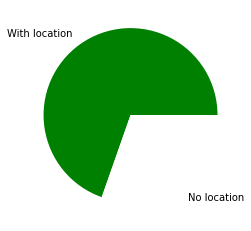

In [5]:
posts_locations = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols= ['location_id'])
loc=posts_locations.notnull().value_counts()

plt.pie(loc, labels=['With location','No location'], labeldistance=1.15,colors=['green', 'white'])

plt.show()

The majority of posts include tagged positions, an addictional detail to capture the attention of those who see it.



5. How many posts include only photos? How many also have videos?

In [7]:
posts_type = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols= ['post_type'])
only_photos=posts_type.loc[posts_type['post_type']==1]
len(only_photos)

41534486

In [11]:
also_videos =posts_type.loc[posts_type['post_type']==3]
len(also_videos)

40943

6. What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


In [19]:
is_business=len(profiles.loc[profiles['is_business_account']==True])/len(profiles)
not_business=1-is_business
print(is_business,not_business)
len(profiles)

0.18965244259672617 0.8103475574032738


4509586

~19% business account vs ~81% not business. Around 3652764 people are using the platform not for business reasons.



# RQ3

1. What is the most common time in which users publish their posts?

In [19]:
posts_cts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['cts'])
posts_cts = posts_cts.dropna() # remove missing values

In [20]:
posts_cts.cts = pd.to_datetime(posts_cts.cts) # convert argument to datetime
posts_cts['time'] = posts_cts.cts.dt.strftime('%H:%M:%S') # select only the time

In [21]:
# Use a dictionary to count how many posts were published at each time
count_posts = {}
for time in posts_cts['time']:
    if time in count_posts:
        count_posts[time]+=1
    else:
        count_posts[time]=1

In [29]:
most_common_time = sorted(count_posts.items(), key=lambda item: item[1], reverse = True) # sort the dictionary 
print('The most common time in which users publish their posts is ' + str(most_common_time[0][0]) + ', with ' +
      str(most_common_time[0][1]) + ' posts.')

The most common time in which users publish their posts is 21:00:09, with 928 posts.


Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [30]:
def n_posts_for_interval(lis):
    '''
    This function counts how many posts have been published in each time interval and plots the result.
    '''
    n = len(lis)
    labels = []
    counts = np.zeros(n)
    for i in range(n):
        labels.append(lis[i][0]+'-'+ lis[i][1])
        for t in posts_cts['time']:
            start, end = lis[i]
            if start <= t <= end:
                counts[i] +=1               
      
    
    plt.figure(figsize=(15,5))
    x = range(n)
    plt.xticks(x, labels, rotation=50)
    plt.bar(x, counts, width = 0.4)
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts')
    plt.title('Number of posts for each interval')
    plt.show()
    return 

3. Use the function that you created in the previous literal to plot the number of posts between the following time intervals:


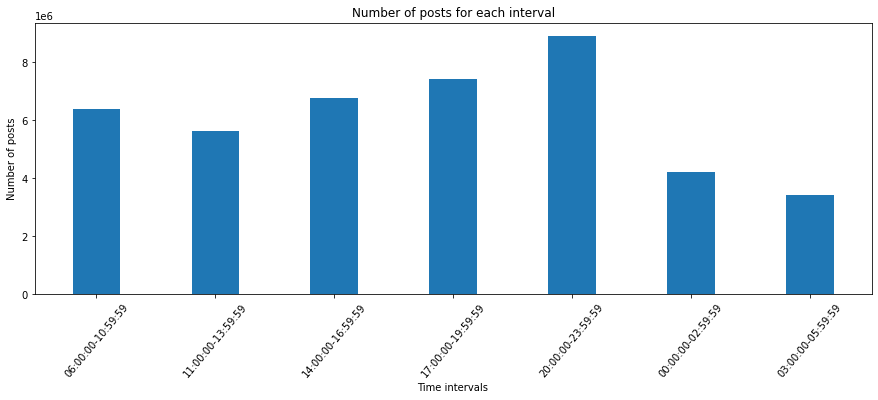

In [31]:
time_intervals = [('06:00:00','10:59:59'),('11:00:00','13:59:59'), ('14:00:00','16:59:59'), ('17:00:00','19:59:59'),
         ('20:00:00', '23:59:59'),('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]
n_posts_for_interval(time_intervals)

# RQ4

In [10]:
def name(id):
    return data1.loc[data1['profile_id'] == id]
def num(n):
    data.sort_values(by='n_posts', inplace=True, ascending=False)
    for i in range(n):
        id=data['profile_id'][i]
        print(name(id))


In [11]:
num(10)

               sid  sid_profile      post_id    profile_id  location_id  \
13627713  40980438      4184446  B0nvWXnFBEx  4.721050e+09  272186955.0   
13627714  40980439      4184446  B0lHr6HF_od  4.721050e+09  216160420.0   
13627715  40980441      4184446  Bz5fUlwl6N1  4.721050e+09  240600923.0   
13627716  40980444      4184446  Bzo0MlIFhA6  4.721050e+09  216733399.0   
13627717  40980447      4184446  By5EP57lVmw  4.721050e+09  216160420.0   
13627718  40980450      4184446  BywSyM8lvhd  4.721050e+09  215245199.0   
13627719  40980453      4184446  ByuzQLWllNU  4.721050e+09          NaN   
13627720  40980456      4184446  Byh2ZdZlMcl  4.721050e+09    2726513.0   
13627721  40980459      4184446  ByWpTQ_FBtb  4.721050e+09  567389653.0   
13627722  40980460      4184446  ByWeIyqlcbw  4.721050e+09  272186955.0   
13627723  40980461      4184446  ByG4lJsFaX3  4.721050e+09  216119667.0   
13627724  40980462      4184446  Bx8u8qJFuMq  4.721050e+09  389983831.0   
28067214  12501312      4

The top 10 personal information with the most posts is:

In [92]:
data.sort_values(by='n_posts', inplace=True, ascending=False)
data

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2022-10-17 19:14:19,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2022-10-17 00:14:06,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2022-10-17 10:00:51,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2022-10-17 02:49:38,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2022-10-17 02:10:07,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,2.438073e+08,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:39:06,NaN
4509577,4184452,6.567796e+08,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:39:23,NaN
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:40:41,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:40:42,NaN


In [149]:
from numpy import *
s=data['profile_id']
lik=[]
com=[]
for i in range(10):
    da=data1.loc[data1['profile_id'] == s[i]]
    lik.append(sum(da['numbr_likes']))
    com.append(sum(da['number_comments']))
print(mean(lik))
print(mean(com))


338.6
9.1


The average number of likes is 715.5 and the average number of comments is 17.5

In [118]:
z=data[0:10]
def time_m(time):
    y=[]
    for i in range(len(time)):
        y.append(sum(z.set_index("cts").between_time("{}".format(time[i][0]), "{}".format(time[i][1]))['n_posts']))
    num_list = y
    x= range(len(time))
    plt.bar(x, num_list)
    plt.show()

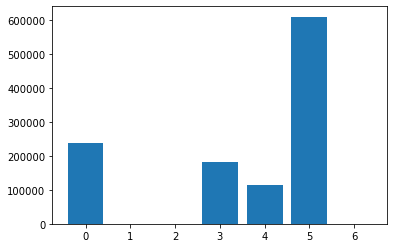

In [119]:
time_m([['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],
['17:00:00','19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']])

The number of posts in the top ten during this time is:

In [147]:

post=data[0:10]
post=post.reset_index()
post

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2022-10-17 19:14:19,False
1,2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2022-10-17 00:14:06,True
2,4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2022-10-17 10:00:51,False
3,3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2022-10-17 02:49:38,False
4,4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2022-10-17 02:10:07,True
5,2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,117099.0,NaN,NaT,False
6,4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,113780.0,bit.ly/2GdIYJl,2022-10-17 21:10:30,True
7,4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,113182.0,bit.ly/2asesw7,2022-10-17 02:08:17,True
8,4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,112777.0,bit.ly/2T2RIqG,2022-10-17 09:28:30,True
9,1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,112723.0,www.flightclub.com/yeezy,2022-10-17 02:41:26,False


The main comment time is spread between twelve and three in the morning, and at night people may be more willing to like posts

# RQ5

183730.0
142428.0
126340.0
125220.0
117262.0
117099.0
113780.0
113182.0
112777.0
112723.0
[183730.0, 142428.0, 126340.0, 125220.0, 117262.0, 117099.0, 113780.0, 113182.0, 112777.0, 112723.0]


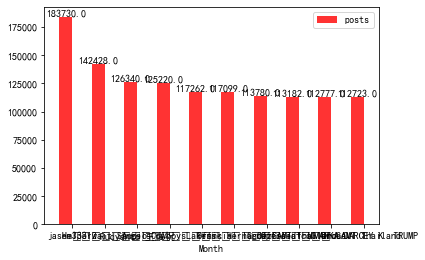

In [149]:

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
n=[]
num=[]
for i in range(10):
       num_list = post['n_posts'][i]
       num.append(num_list)
       x= post['firstname_lastname'][i]
       n.append(x)
x=range(len(num))
rects1 = plt.bar(x, height=num, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x], n)
plt.xlabel("Month")

plt.title("")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()

Top 10 with the most posts

In [35]:
data.sort_values(by='followers', inplace=True, ascending=False)
flo=data[0:10]
flo=flo.reset_index()
flo

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
1,2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
2,3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
3,701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
4,2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
5,2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
6,333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
7,3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
8,1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
9,1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


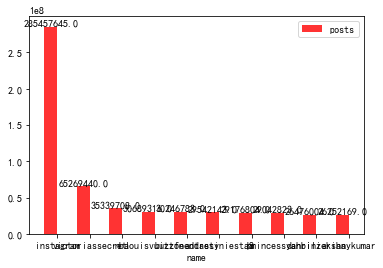

In [187]:

n=[]
num=[]
for i in range(10):
       num_list = flo['followers'][i]
       num.append(num_list)
       x= flo['profile_name'][i]
       n.append(x)
x=range(len(num))
rects1 = plt.bar(x, height=num, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x], n)
plt.xlabel("name")

plt.title("")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()

Top 10 with the most follwers

So the most followed user is Instagram, which has 285457645.0 followers

In [56]:
data2= pd.read_csv('instagram_locations.csv', sep='\t')


In [125]:
flo['profile_id'][0]
area=[]
loca=[]
lo=data1[data1['profile_id']==flo['profile_id'][0]]
for i in range(len(lo)):
    location=data2[data2['id']==lo['location_id'][i]]
    area.append(location[['dir_country_name']].values[0])  
    loca.append(location[['dir_city_name']].values[0])

print(area)
print(loca)



[array(['United States'], dtype=object), array([nan], dtype=object), array(['Peru'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array([nan], dtype=object), array(['Spain'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array(['China'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array(['Netherlands'], dtype=object), array([nan], dtype=object), array(['Thailand'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United States'], dtype=object), array([nan], dtype=object), array(['Japan'], dtype=object), array([nan], dtype=object), array(['Australia'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), 

It can be seen that the most common region is the United Kingdom

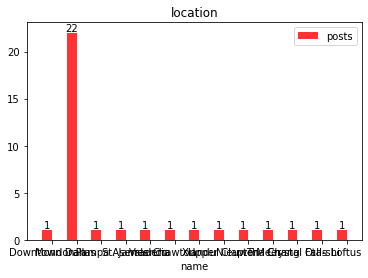

In [133]:
loc1=[]
for i in range(len(loca)):
    loc1.append(loca[i].astype(str).item())

dict = {}
for key in loc1:
    dict[key] = dict.get(key, 0) + 1
key1=[]
value1=[]
for key in dict.keys():
    key1.append(key)
    
for value in dict.values():
    value1.append(value)
x=range(len(key1))
rects1 = plt.bar(key1, height=value1, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x],key1)
plt.xlabel("name")
plt.title("location")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()


It can be seen that there are 22 posts without cities, and the other cities appear once

In [110]:
data2

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628


In [46]:

flo['profile_id'][0]
no=data1[data1['profile_id']==flo['profile_id'][0]]
no=no.reset_index()
a=0
b=0
c=0

for i in range(len(no)):
    if no['post_type'][i]==1:
        a=a+1
    if no['post_type'][i]==2:
        b=b+1
    if no['post_type'][i]==3:
        c=c+1


Image

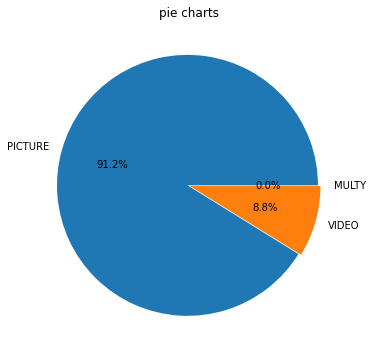

In [47]:
plt.figure(figsize=(6,6))
label=['PICTURE','VIDEO','MULTY']
explode=[0.01,0.01,0.01]
values=[a,b,c]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
plt.title('pie charts')
plt.show()


It can be seen that the proportion of pure pictures occupies 91.2%, indicating that  people like to post pictures, and there are neither of them

In [53]:
from numpy import *
like1=[]
like2=[]
like3=[]
comment1=[]
comment2=[]
comment3=[]
for i in range(len(no)):
    if no['post_type'][i]==1:
        like1.append(no['numbr_likes'][i])
        comment1.append(no['number_comments'][i])
    if no['post_type'][i]==2:
        like2.append(no['numbr_likes'][i])
        comment2.append(no['number_comments'][i])
    if no['post_type'][i]==3:
        ike3.append(no['numbr_likes'][i])
        comment3.append(no['number_comments'][i])
like1=mean(like1)
like2=mean(like2)
like3=mean(like3)
comment1=mean(comment1)
comment2=mean(comment2)
comment3=mean(comment3)
print(like1,like2,like3,comment1,comment2,comment3)
print(flo['followers'][0])

905933.4516129033 593409.6666666666 nan 6703.290322580645 5749.333333333333 nan
285457645.0


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


His 285457645 followers, with less than three-thousandths of the likes on each post, indicate that the fans may not be genuine

Images with an average of 905933 likes and 6703 comments, while videos have an average of 593409 likes and 5749 comments, you can see that images are more clickable

# RQ6

1. What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [5]:
profiles_info = profiles[['profile_id','profile_name','following','followers']]
profiles_info = profiles_info.dropna() 
posts_info = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['profile_id','cts'])
posts_info = posts_info.dropna()  
joined_df = pd.merge(profiles_info,posts_info) # join dataframes of interest
joined_df = joined_df.dropna() 

In [6]:
def average_time_between_posts(posts_time):
    '''
    This function computers the average time (in days and minutes) a user lets pass before publishing another post.
    Through the use of a dictionary, it associates to each subject his post publication time.
    At first, it determinate the average time a single lets pass before publishing another post (so the number of posts must be greater 
    than one) by calculating the difference between the dates. Then, it determinate the total average for all profiles.
    It returns a dictionary which associates to each profile its average time and the total time average in seconds.
    '''
    dic_of_times = {} 
    for l in posts_time:
        subj,time = l[0],l[1]
        if subj in dic_of_times:
            dic_of_times[subj].append(time)
        else:
            dic_of_times[subj] = [time]

    dic_of_averages = {}
    for subj,times in dic_of_times.items():
        l= []
        times = sorted(times,reverse=True)
        if len(times) > 1:
            for i in range(len(times)-1):
                diff = times[i] - times[i+1]
                duration_in_s = diff.total_seconds()
                l.append(duration_in_s)
            dic_of_averages[subj] = np.average(l)
            
    list_of_averages = list(map(int,dic_of_averages.values()))
    total_average = np.average(list_of_averages)

    return dic_of_averages,total_average

In [7]:
joined_df.cts = pd.to_datetime(joined_df.cts) # convert argument to datetime in order to can calculate difference

posts_time = joined_df[['profile_name','cts']].to_numpy() # convert the dataframe to a numpy array to facilitate access
     
dic_of_averages, total_average = average_time_between_posts(posts_time)
days = int(total_average/86400) # total average in days
minutes= int(((total_average/86400)%1)*1440) # total average in minutes

print('The average time (in days) a user lets pass before publishing another post is: ' + str(days))
print('The average time (in minutes) a user lets pass before publishing another post is: ' + str(minutes))

The average time (in days) a user lets pass before publishing another post is: 24
The average time (in minutes) a user lets pass before publishing another post is: 624


In [8]:
sorted_averages = sorted(dic_of_averages.items(), key=lambda item: item[1]) # sort averages
# top 3 users profile_name
print(sorted_averages[0][0])
print(sorted_averages[1][0])
print(sorted_averages[2][0])

radilyubenmorris
bodied_by_vinny
whoareyou10111


Text(0, 0.5, 'Number of followers')

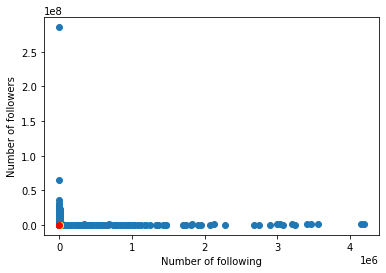

In [9]:
top1 = profiles_info[profiles_info['profile_name'] == sorted_averages[0][0]] 
top2 = profiles_info[profiles_info['profile_name'] == sorted_averages[1][0]]
top3 = profiles_info[profiles_info['profile_name'] == sorted_averages[2][0]]

plt.scatter(x = profiles['following'], y =profiles['followers'])
plt.scatter(x = top1['following'], y = top1['followers'], c = 'green')
plt.scatter(x = top2['following'], y = top2['followers'], c = 'yellow')
plt.scatter(x = top3['following'], y = top3['followers'], c = 'red')

plt.xlabel('Number of following')
plt.ylabel('Number of followers')


We can conclude that there is no correlation between average time between posts and number of following/followers of a profile. In fact, the 3 top profiles have very few followers and following even if they publish very often.

2. Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [ ]:
posts_likes_comments = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['cts','numbr_likes','number_comments'])
posts_likes_comments = posts_likes_comments.dropna() 
posts_likes_comments.cts = pd.to_datetime(posts_likes_comments.cts) # convert argument to datetime 
posts_likes_comments['time'] = posts_likes_comments.cts.dt.strftime('%H:%M:%S') # select the time

In [3]:
# convert the dataframes to a numpy array to facilitate access
posts_likes = posts_likes_comments[['time','numbr_likes']].to_numpy() 
posts_comments = posts_likes_comments[['time', 'number_comments']].to_numpy()

In [6]:
def average_number_for_each_time_interval(lis, posts):
    '''
    This function computes the average number of the input values and associates it with the corresponding time interval.
    It returns a dictionary of averages.
    '''
    n = len(lis)    
    dic = {}
    for i in range(n):
        label = lis[i][0]+'-'+ lis[i][1]
        for l in posts:
            t,num = l[0],l[1]
            start, end = lis[i]
            if start <= t <= end:
                if label in dic:
                    dic[label].append(num) 
                else:
                    dic[label] = [num]
                    
        
    dic_of_averages = {}
    for label,values in dic.items():
        dic_of_averages[label] = np.average(values)
      
    return dic_of_averages

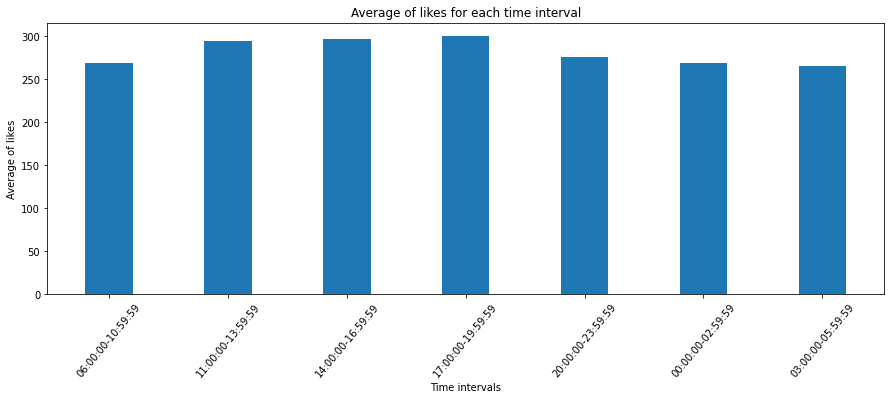

In [8]:
#Plot the time intervals with the highest average number of “likes” 
time_intervals = [('06:00:00','10:59:59'),('11:00:00','13:59:59'), ('14:00:00','16:59:59'), ('17:00:00','19:59:59'),
         ('20:00:00', '23:59:59'),('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]
dic_of_averages = average_number_for_each_time_interval(time_intervals, posts_likes)

plt.figure(figsize=(15,5))
x = range(len(time_intervals))
plt.xticks(x, dic_of_averages.keys(), rotation=50)
plt.bar(x, dic_of_averages.values(), width = 0.4)
plt.xlabel('Time intervals')
plt.ylabel('Average number of likes')
plt.title('Average number of likes for each time interval')
plt.show()

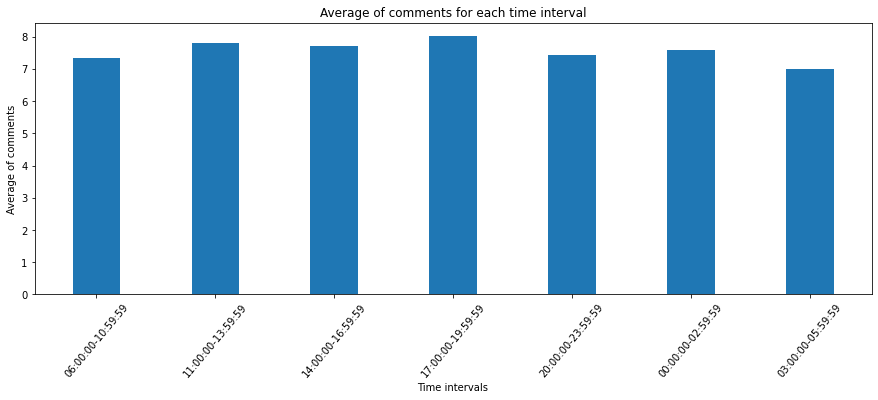

In [9]:
#Plot the time intervals with the highest average number of comments on posts.
dic_of_averages = average_number_for_each_time_interval(time_intervals, posts_comments)

plt.figure(figsize=(15,5))
x = range(len(time_intervals))
plt.xticks(x, dic_of_averages.keys(), rotation=50)
plt.bar(x, dic_of_averages.values(), width = 0.4)
plt.xlabel('Time intervals')
plt.ylabel('Average number of comments')
plt.title('Average number of comments for each time interval')
plt.show()

# RQ7

1. What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [3]:
profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t',usecols=['followers','profile_id'])
profiles['profile_id'].dropna(inplace=True)

In [4]:
posts=pd.read_csv('instagram_posts.csv',usecols=['numbr_likes','profile_id'], delimiter='\t')
posts.dropna(inplace=True)

In [5]:
merged=pd.merge(posts,profiles, on='profile_id')

In [6]:
p=merged[merged['numbr_likes']>0.2*merged['followers']].profile_id.count()/len(merged)
p

0.15443202404170936

The probability that a post receives more than 20% "likes" of the number of followers a user has it's ~15.5%.

2. Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [7]:
posts=pd.read_csv('instagram_posts.csv',usecols=['location_id','profile_id','post_id'], delimiter='\t')
posts.dropna(inplace=True)

In [8]:
loc=posts.groupby(['location_id','profile_id']).count()

In [9]:
p=loc[loc['post_id']>1].count()/len(posts['profile_id'].unique())
p

post_id    0.261405
dtype: float64

Usually users doesn't return to locations, it happens with ~ 26% probability and doesn't really make sense. A user can get back to a place he/she visited and not necessarily post again the location.

# RQ8

1. Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.


In [10]:
posts=pd.read_csv('instagram_posts.csv',usecols=['numbr_likes','number_comments'], delimiter='\t')

In [12]:
plt.scatter(posts['numbr_likes'],posts['number_comments'], c=np.random.rand(42710197), alpha=0.5)
plt.show()


KeyboardInterrupt



2. Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.


3. What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.


4. What are histograms, bar plots, scatterplots and pie charts used for?



5. What insights can you extract from a Box Plot?

##### BONUS A

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data = pd.read_csv('/Users/emma/Desktop/Data/instagram_profiles.csv', sep='\t',nrows=10000)

In [3]:
#Sorting users by number of followers
data=data.dropna()
data=data.sort_values(by = "followers", ascending = False)
data=data.reset_index()
print(type(data['followers'][1]))
data

<class 'numpy.float64'>


,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,5424,4190972,29875130,izzueislam,Izzue Islam,☎️: +60129111241 @awinnurin\n📧: iianenterprise...,179.0,2793338.0,5289.0,youtube.com/izzueislamtv,2019-08-01 21:20:58.700 -0400,False
1,9553,4195046,1319369724,mrs.druzhinina,🏆САМАЯ ТОПОВАЯ ИНСТА-МАМА,Ирина Дружинина \n🌿О МАТЕРИНСТВЕ и не только\n...,135.0,1990775.0,1093.0,www.i-druzhinina.com,2019-08-02 02:33:33.239 -0400,True
2,9551,4195072,311156678,jadsejadson,Jads & Jadson,A dupla mais SERTANEJA do País! \nShows com @n...,447.0,1658275.0,2739.0,www.youtube.com/watch?v=trK0YxtC3c8&feature=yo...,2019-08-02 02:35:47.050 -0400,True
3,9549,4195063,332701752,barbara.labres,Bárbara Labres,Dj 🎧🎙\nContato: assessoria@barbaralabres.com.b...,315.0,1159690.0,630.0,www.youtube.com/channel/UC21hbQfYStwFPV30IX1AOZA,2019-08-02 02:35:11.517 -0400,False
4,896,4185356,790343516,kikkafede88,Federica Pellegrini,Olympic.World.European.Champion. WR 200free.🏊🏻...,590.0,1043584.0,2189.0,tv8.it/streaming.html,2019-08-01 15:44:46.301 -0400,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2152,1195,4185643,10492989816,bandofrunnersuk,Martyn Glover,BSc Hons Sport and Exercise Science\nUK Athlet...,19.0,27.0,13.0,www.bandofrunners.co.uk,2019-08-01 16:06:00.922 -0400,True
2153,5519,4191058,13060431175,ideacomunefumane,Idea Comune Fumane,Lista Civica per Fumane\n“Un territorio amato ...,14.0,27.0,7.0,www.ideacomunefumane.it,2019-08-01 21:28:31.515 -0400,True
2154,7123,4192667,1208887142,bartezfs,Ilya Bartez,Монтажоп\nВсё остальное интересное по ссылке в...,16.0,25.0,38.0,linktr.ee/bartezfs,2019-08-01 23:26:32.546 -0400,False
2155,1495,4185941,5738244028,a_barutkin,ПРИРОДА🌲ПРОГУЛКИ🚶‍♂️ПИТЕР☔,Андрей\nЯ из Санкт-Петербурга⚓🌦️\nЛюблю живопи...,33.0,22.0,590.0,vk.com/madonnafan,2019-08-01 16:26:41.489 -0400,False


In [4]:
#The first group takes the top 10% of "followers"
df1 =data[0:215]
df1

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,5424,4190972,29875130,izzueislam,Izzue Islam,☎️: +60129111241 @awinnurin\n📧: iianenterprise...,179.0,2793338.0,5289.0,youtube.com/izzueislamtv,2019-08-01 21:20:58.700 -0400,False
1,9553,4195046,1319369724,mrs.druzhinina,🏆САМАЯ ТОПОВАЯ ИНСТА-МАМА,Ирина Дружинина \n🌿О МАТЕРИНСТВЕ и не только\n...,135.0,1990775.0,1093.0,www.i-druzhinina.com,2019-08-02 02:33:33.239 -0400,True
2,9551,4195072,311156678,jadsejadson,Jads & Jadson,A dupla mais SERTANEJA do País! \nShows com @n...,447.0,1658275.0,2739.0,www.youtube.com/watch?v=trK0YxtC3c8&feature=yo...,2019-08-02 02:35:47.050 -0400,True
3,9549,4195063,332701752,barbara.labres,Bárbara Labres,Dj 🎧🎙\nContato: assessoria@barbaralabres.com.b...,315.0,1159690.0,630.0,www.youtube.com/channel/UC21hbQfYStwFPV30IX1AOZA,2019-08-02 02:35:11.517 -0400,False
4,896,4185356,790343516,kikkafede88,Federica Pellegrini,Olympic.World.European.Champion. WR 200free.🏊🏻...,590.0,1043584.0,2189.0,tv8.it/streaming.html,2019-08-01 15:44:46.301 -0400,False
...,...,...,...,...,...,...,...,...,...,...,...,...
210,8267,4193813,18925969,louisaguirre,Louis Aguirre,It’s a game. Enjoy the ride. It’s ALL beautifu...,1420.0,14967.0,1908.0,www.HeartsAndStarsGala.com,2019-08-02 00:54:42.572 -0400,False
211,2712,4188300,5389527111,pervayaok,Первая отделочная компания,Ремонт🏙\nОтделка🏘\nДизайн-проект в подарок🎁\n☎...,4148.0,14851.0,369.0,1-o-k.com,2019-08-01 18:01:29.324 -0400,True
212,9582,4195129,1294754075,pimentel_minas,Fernando Pimentel,"Economista, Professor, foi Prefeito de Belo Ho...",215.0,14610.0,663.0,www.doepimentel.com.br,2019-08-02 02:39:14.897 -0400,True
213,9248,4194750,484872066,bombergcolombia,Bomberg Colombia,Bomberg Colombia,1652.0,14449.0,1642.0,www.bombergwatches.com,2019-08-02 02:09:45.384 -0400,True


In [5]:
#The second group takes the rest of the followers
df2 = data[215:]
df2

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
215,9848,4195375,1295379,flipout,Flipout,Severe Record Nerd.\n@flipvinyl\n@slowjamsunda...,4148.0,14306.0,4080.0,www.mixcloud.com/Flipout/playlists/dancehall-d...,2019-08-02 02:59:10.764 -0400,True
216,4595,4190199,174133665,tarynleighh,"Taryn Bond, Yoga Teacher",Hawai’i-based Yoga Teacher + Writer ॐ📝\nI help...,989.0,14159.0,925.0,www.flowswitht.com,2019-08-01 20:20:56.660 -0400,True
217,7914,737439,52494968,wearemotto,Motto,⚡️We help brands stand out & change the game\n...,5703.0,13785.0,1291.0,bit.ly/2LDyE33,2019-03-26 00:35:47.980 -0400,True
218,626,4185096,7578372620,privetmos,"Привет, Москва!","«Привет, Москва!» – это новый проект о любимом...",4.0,13705.0,167.0,privetmoscow.ru/stages,2019-08-01 15:26:04.461 -0400,True
219,147,4184620,1443725050,fedoseev_tattoo,ТАТУ В Москве,Tattoo Artist\nKirill Fedoseev\nMoscow|Barnaul...,784.0,13700.0,249.0,vk.com/id95712830,2019-08-01 14:48:52.540 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2152,1195,4185643,10492989816,bandofrunnersuk,Martyn Glover,BSc Hons Sport and Exercise Science\nUK Athlet...,19.0,27.0,13.0,www.bandofrunners.co.uk,2019-08-01 16:06:00.922 -0400,True
2153,5519,4191058,13060431175,ideacomunefumane,Idea Comune Fumane,Lista Civica per Fumane\n“Un territorio amato ...,14.0,27.0,7.0,www.ideacomunefumane.it,2019-08-01 21:28:31.515 -0400,True
2154,7123,4192667,1208887142,bartezfs,Ilya Bartez,Монтажоп\nВсё остальное интересное по ссылке в...,16.0,25.0,38.0,linktr.ee/bartezfs,2019-08-01 23:26:32.546 -0400,False
2155,1495,4185941,5738244028,a_barutkin,ПРИРОДА🌲ПРОГУЛКИ🚶‍♂️ПИТЕР☔,Андрей\nЯ из Санкт-Петербурга⚓🌦️\nЛюблю живопи...,33.0,22.0,590.0,vk.com/madonnafan,2019-08-01 16:26:41.489 -0400,False


In [6]:
data1 = pd.read_csv('/Users/emma/Desktop/Data/instagram_posts.csv', sep='\t',nrows=2000)

In [7]:
data1.groupby("profile_id").groups

{136541: [526], 236296: [273], 326278: [626], 329994: [8], 459935: [1841], 550300: [75], 633232: [1083], 659419: [1458], 735442: [475], 798577: [267], 906219: [1673], 933930: [608], 948311: [1704], 1018878: [1536], 1028435: [389], 1302367: [264], 1550112: [534], 1674690: [1905], 2025538: [1115], 2362904: [298], 2394062: [1445], 2414626: [891], 2425272: [1694], 2442187: [322], 2894735: [191], 2959406: [1362], 3421314: [1308], 3505953: [1222], 3779437: [144], 3936107: [1482], 3952411: [1141], 4137913: [1096], 4159499: [1177], 4241460: [1236], 4285702: [663], 4408528: [411], 4479605: [1982], 4572086: [1402], 4645057: [572], 4803320: [1802], 4810447: [390], 5107724: [353], 5232540: [701], 5737877: [1806], 5838727: [1146], 5953245: [402], 6080035: [174, 183, 186], 6100581: [91], 6102916: [1436], 6220781: [1792], 6348167: [243], 6390746: [1963], 6482535: [1447], 6517756: [67], 6906865: [1363], 7061024: [1861], 7145644: [1784], 7166058: [306, 307], 7347783: [1799], 7701044: [1051], 7758544: [

In [8]:
data1['cts']=pd.to_datetime(data1['cts'])
data1

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27,1,thE sky gavE mE a #constEllation,8,0
...,...,...,...,...,...,...,...,...,...,...
1995,28372964,-1,BughtFdHpVv,1533802441,244839594,2019-03-02 14:50:35,1,😍🐕🐕,32,2
1996,28372965,-1,BubE0fRAqVP,3596685861,244839594,2019-02-28 12:07:00,2,#igerstunisia 🇹🇳🇹🇳 #instadog #instahappy #gsd ...,36,2
1997,28372966,-1,BuJHVQlHzPA,339363062,244839594,2019-02-21 12:37:37,1,Les plus beaux moments dans la vie sont gratuits,9,0
1998,28372967,-1,BuEnLcJHMpG,1423519562,244839594,2019-02-19 18:39:41,1,#billard🎱 #poolgirl #winner #gamingtime,45,0


In [9]:
#Average posting interval of the first group
x=0
for i in  range(0,100):
    y=data1['cts'][i+1]-data1['cts'][i]
    x=x+y.days
x/100

6.12

In [16]:
#Average posting interval of the second group
x=0
for i in  range(0,1900):
    y=data1['cts'][i+1]-data1['cts'][i]
    x=x+y.days
-x/100

10.36

In [ ]:
The more fans you have, the shorter the average time between posts

**BONUS C**

Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [85]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from enchant.checker import SpellChecker

In [86]:
posts_descriptions = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['description'], nrows= 1000)
posts_descriptions= posts_descriptions.dropna()
posts_descriptions = posts_descriptions.to_numpy()

1. **English sentences Selection**: this phase returns a list of all the alphabetical English sentences in the descriptions of the posts.

In [88]:
def written_in_english(sentence):
    d = SpellChecker("en_US")
    d.set_text(sentence)
    errors = [err for err in d]
    if len(errors) > 4:
        return False
    return True

In [89]:
english_sentences = []
for description in posts_descriptions:
    if len(description[0]) >2 and written_in_english(description[0]): 
        english_sentences.append(description[0])

print('English Sentences:', english_sentences[:100]) # to get a better view of the output, I print only the first one hounder rows

English Sentences: ['#teatime #scorpion #friends #love #mountains #september', 'thE sky gavE mE a #constEllation', '#beautiful #Christmas #lights', 'As per your suggestion. #themerrytriotakeslondon', '-Blue-💙', 'everything still feels so surreal ☁️', "Guinness O'clock 🍺🍺 #london #pub #guinness #love", 'Hip hip hip #TheCrown 👑 saison 2 c est pour le 8 décembre 🎉🎊😻', 'Cheers! Returning to this café after 5 years.\\n*\\n*\\n*\\n#bar #pub #london #thecrown #sevendials #return', 'Gineaus Guinness', 'Cheeky beer after the curry #londonlife', '👑 🇬🇧', 'While the baby sleeps we drink 🍻', 'геймеры😂', 'Детский праздник.!', 'A wild Pikachu appears!', "Welcome humans to the Storm Force Accelatron. Due to the highly confidential nature of this mission please keep all cell phones, go pros, and other recording devices away. Spin the metal wheel in front of you to augment Storm's power. Good luck in defeating the terribly misunderstood Magneto. #uotmlife #storm #xmen #marvel #drip #mutant", 'Inside the

2. **Words Tokenization**: this phase returns a list of all the alphabetical English words in the descriptions of the posts, removing punctuations and emojis.

In [90]:
tokenized_english_words = []
for sentence in english_sentences:
    tokenized_words= word_tokenize(sentence)
    for word in tokenized_words:
        if word.encode().isalpha(): # removes punctuations and emojis
            tokenized_english_words.append(word)

print('Tokenized English Words:', tokenized_english_words[:100]) # to get a better view of the output, I print only the first one hounder rows

Tokenized English Words: ['teatime', 'scorpion', 'friends', 'love', 'mountains', 'september', 'thE', 'sky', 'gavE', 'mE', 'a', 'constEllation', 'beautiful', 'Christmas', 'lights', 'As', 'per', 'your', 'suggestion', 'themerrytriotakeslondon', 'everything', 'still', 'feels', 'so', 'surreal', 'Guinness', 'london', 'pub', 'guinness', 'love', 'Hip', 'hip', 'hip', 'TheCrown', 'saison', 'c', 'est', 'pour', 'le', 'Cheers', 'Returning', 'to', 'this', 'after', 'bar', 'pub', 'london', 'thecrown', 'sevendials', 'return', 'Gineaus', 'Guinness', 'Cheeky', 'beer', 'after', 'the', 'curry', 'londonlife', 'While', 'the', 'baby', 'sleeps', 'we', 'drink', 'A', 'wild', 'Pikachu', 'appears', 'Welcome', 'humans', 'to', 'the', 'Storm', 'Force', 'Accelatron', 'Due', 'to', 'the', 'highly', 'confidential', 'nature', 'of', 'this', 'mission', 'please', 'keep', 'all', 'cell', 'phones', 'go', 'pros', 'and', 'other', 'recording', 'devices', 'away', 'Spin', 'the', 'metal', 'wheel']


3. **Intial Frequency Distribution**: this phase records the number of times each words occurred in this initial phase, to then see the differences with the final phase of natural language data analysis.

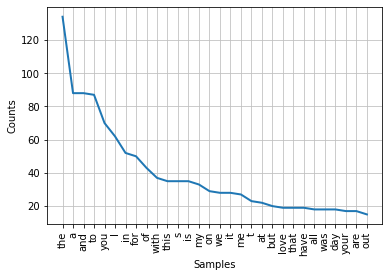

In [91]:
freq_dist = FreqDist(tokenized_english_words)
    
freq_dist.plot(30,cumulative=False)
plt.show()

4. **Removing Stopwords**: in this phase the most common English words in data are removed.

In [92]:
stop_words = set(stopwords.words("english"))
words_without_stopwords = []
for word in tokenized_english_words: 
     if word not in stop_words:
        words_without_stopwords.append(word)

print("Strings without Stopwords:", words_without_stopwords[:100]) # to get a better view of the output, I print only the first one hounder rows

Strings without Stopwords: ['teatime', 'scorpion', 'friends', 'love', 'mountains', 'september', 'thE', 'sky', 'gavE', 'mE', 'constEllation', 'beautiful', 'Christmas', 'lights', 'As', 'per', 'suggestion', 'themerrytriotakeslondon', 'everything', 'still', 'feels', 'surreal', 'Guinness', 'london', 'pub', 'guinness', 'love', 'Hip', 'hip', 'hip', 'TheCrown', 'saison', 'c', 'est', 'pour', 'le', 'Cheers', 'Returning', 'bar', 'pub', 'london', 'thecrown', 'sevendials', 'return', 'Gineaus', 'Guinness', 'Cheeky', 'beer', 'curry', 'londonlife', 'While', 'baby', 'sleeps', 'drink', 'A', 'wild', 'Pikachu', 'appears', 'Welcome', 'humans', 'Storm', 'Force', 'Accelatron', 'Due', 'highly', 'confidential', 'nature', 'mission', 'please', 'keep', 'cell', 'phones', 'go', 'pros', 'recording', 'devices', 'away', 'Spin', 'metal', 'wheel', 'front', 'augment', 'Storm', 'power', 'Good', 'luck', 'defeating', 'terribly', 'misunderstood', 'Magneto', 'uotmlife', 'storm', 'xmen', 'marvel', 'drip', 'mutant', 'Inside', '

5. **Lexicon Normalization**

- **Stemming**: can be descriped as the process of reducing a word to its stem or root format.

- **Lemmatization**: can be described as the transformation that uses a dictionary to map a word's variant back to its root format.

In [93]:
ps = PorterStemmer()
stemmed_strings = []
for word in tokenized_english_words:
    stemmed_strings.append(ps.stem(word))

lem = WordNetLemmatizer()
lemmatized_strings = []
for word in tokenized_english_words:
    lemmatized_strings.append(lem.lemmatize(word))
    
print("Stremmed strings:", stemmed_strings[:100]) #to get a better view of the output, I print only the first one hounder rows
print('\n')
print("Lemmatized strings:", lemmatized_strings[:100]) #to get a better view of the output, I print only the first one hounder rows

Stremmed strings: ['teatim', 'scorpion', 'friend', 'love', 'mountain', 'septemb', 'the', 'sky', 'gave', 'me', 'a', 'constel', 'beauti', 'christma', 'light', 'as', 'per', 'your', 'suggest', 'themerrytriotakeslondon', 'everyth', 'still', 'feel', 'so', 'surreal', 'guin', 'london', 'pub', 'guin', 'love', 'hip', 'hip', 'hip', 'thecrown', 'saison', 'c', 'est', 'pour', 'le', 'cheer', 'return', 'to', 'thi', 'after', 'bar', 'pub', 'london', 'thecrown', 'sevendi', 'return', 'gineau', 'guin', 'cheeki', 'beer', 'after', 'the', 'curri', 'londonlif', 'while', 'the', 'babi', 'sleep', 'we', 'drink', 'a', 'wild', 'pikachu', 'appear', 'welcom', 'human', 'to', 'the', 'storm', 'forc', 'accelatron', 'due', 'to', 'the', 'highli', 'confidenti', 'natur', 'of', 'thi', 'mission', 'pleas', 'keep', 'all', 'cell', 'phone', 'go', 'pro', 'and', 'other', 'record', 'devic', 'away', 'spin', 'the', 'metal', 'wheel']


Lemmatized strings: ['teatime', 'scorpion', 'friend', 'love', 'mountain', 'september', 'thE', 'sky', 'g

6. **Final Frequency Distribution**: records the number of times each words occurred at the end of the natural language data analysis.

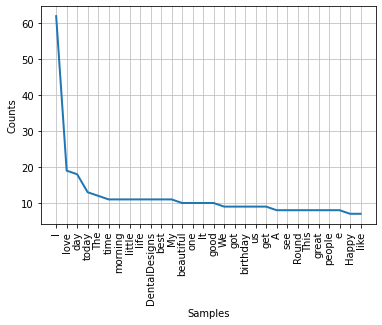

In [95]:
final_freq_dist = FreqDist(words_without_stopwords)
    
final_freq_dist.plot(30,cumulative=False)
plt.show()

After the NTL analysis, we can conclude that the **20 most common words** in the descriptions of the posts are:

In [96]:
most_common_words= FreqDist(words_without_stopwords).most_common(20)
most_common_words

[('I', 62),
 ('love', 19),
 ('day', 18),
 ('today', 13),
 ('The', 12),
 ('time', 11),
 ('morning', 11),
 ('little', 11),
 ('life', 11),
 ('DentalDesigns', 11),
 ('best', 11),
 ('My', 11),
 ('beautiful', 10),
 ('one', 10),
 ('It', 10),
 ('good', 10),
 ('We', 9),
 ('got', 9),
 ('birthday', 9),
 ('us', 9)]

The **20 most common topics** in the descriptions of the posts are:

In [97]:
most_common_topics = FreqDist([x for x in words_without_stopwords if len(x)>3]).most_common(20)
most_common_topics

[('love', 19),
 ('today', 13),
 ('time', 11),
 ('morning', 11),
 ('little', 11),
 ('life', 11),
 ('DentalDesigns', 11),
 ('best', 11),
 ('beautiful', 10),
 ('good', 10),
 ('birthday', 9),
 ('Round', 8),
 ('This', 8),
 ('great', 8),
 ('people', 8),
 ('Happy', 7),
 ('like', 7),
 ('made', 7),
 ('years', 7),
 ('look', 7)]